# **Notes for Scikit-learn Crash Course - Machine Learning Library for Python**

### Part 1 - Introducing Scikit-Learn

In [70]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import pandas as pd
import numpy as np

In [ ]:
X, y = load_iris(return_X_y=True)  # This will load the iris dataset

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression

In [73]:
mod = KNeighborsRegressor().fit(X, y) 
# mod = LinearRegression()
pipe = Pipeline([
    ("scale", StandardScaler()),
    ("model", KNeighborsRegressor())
])
# pipe.get_params()

In [74]:
mod = GridSearchCV(estimator=pipe,
                param_grid={
                    "model__n_neighbors": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],},
                cv=5)

In [75]:
mod.fit(X, y)
pd.DataFrame(mod.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001320,0.000390,0.001635,0.000865,1,{'model__n_neighbors': 1},1.0,0.850000,0.0,0.700000,0.0,0.510000,0.427083,10
1,0.001442,0.000832,0.001497,0.000443,2,{'model__n_neighbors': 2},1.0,0.925000,0.0,0.662500,0.0,0.517500,0.437150,9
2,0.000694,0.000388,0.000590,0.000482,3,{'model__n_neighbors': 3},1.0,0.950000,0.0,0.650000,0.0,0.520000,0.441135,7
3,0.001005,0.000308,0.001051,0.000608,4,{'model__n_neighbors': 4},1.0,0.943750,0.0,0.662500,0.0,0.521250,0.440695,6
4,0.001206,0.000453,0.000988,0.000019,5,{'model__n_neighbors': 5},1.0,0.934000,0.0,0.676000,0.0,0.522000,0.439753,5
5,0.001178,0.000727,0.001334,0.000377,6,{'model__n_neighbors': 6},1.0,0.929167,0.0,0.766667,0.0,0.539167,0.446682,1
6,0.001201,0.000326,0.001359,0.000591,7,{'model__n_neighbors': 7},1.0,0.917347,0.0,0.761224,0.0,0.535714,0.444081,2
7,0.001324,0.000422,0.001020,0.000042,8,{'model__n_neighbors': 8},1.0,0.887500,0.0,0.767969,0.0,0.531094,0.439802,3
8,0.001875,0.001087,0.001143,0.000283,9,{'model__n_neighbors': 9},1.0,0.866667,0.0,0.744444,0.0,0.522222,0.433988,4
9,0.001199,0.000383,0.001239,0.000378,10,{'model__n_neighbors': 10},1.0,0.862000,0.0,0.727000,0.0,0.517800,0.431506,8


In [ ]:
pred = mod.predict(X)

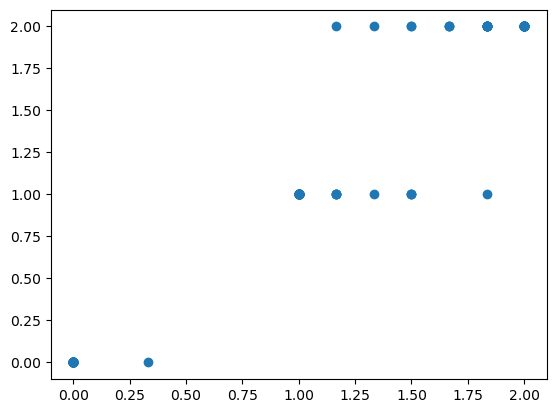

In [78]:
plt.scatter(pred, y)

In [ ]:
print(load_iris()['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

### Part 2 - Preprocessing

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("data/data.csv")

In [ ]:
df.head(3)

,x,y,z
0,34,485.333336,a
1,33,485.333336,a
2,29,483.333336,a


In [ ]:
X = df[['x', 'y']].values
y = df['z'] == "a"

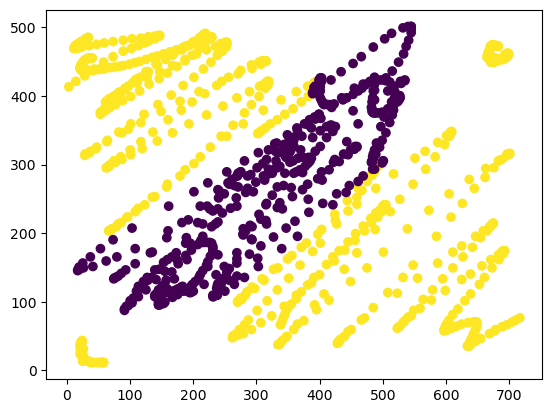

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y)

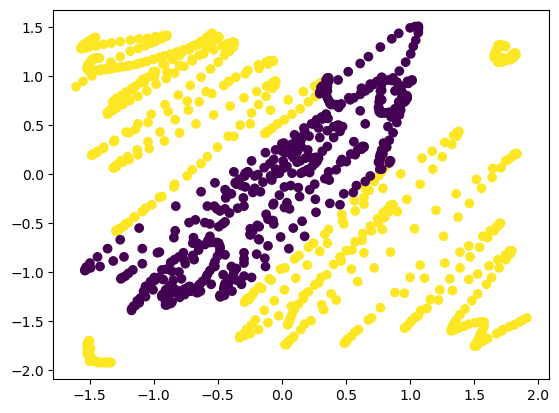

In [ ]:
from sklearn.preprocessing import StandardScaler
X_new = StandardScaler().fit_transform(X)
plt.scatter(X_new[:, 0], X_new[:, 1], c=y)

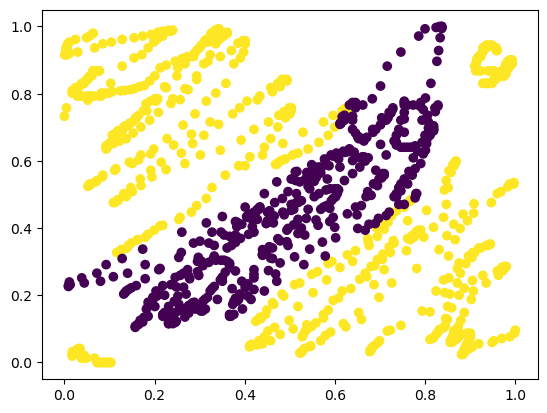

In [ ]:
from sklearn.preprocessing import StandardScaler, QuantileTransformer
X_new = QuantileTransformer().fit_transform(X)
plt.scatter(X_new[:, 0], X_new[:, 1], c=y)

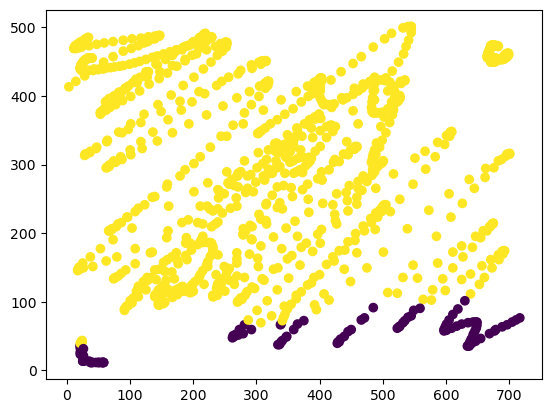

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ("scale", QuantileTransformer()),
    ("model", LogisticRegression())
])

pred = pipe.fit(X, y).predict(X)
plt.scatter(X[:, 0], X[:, 1], c=pred)

c:\Users\yko72\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


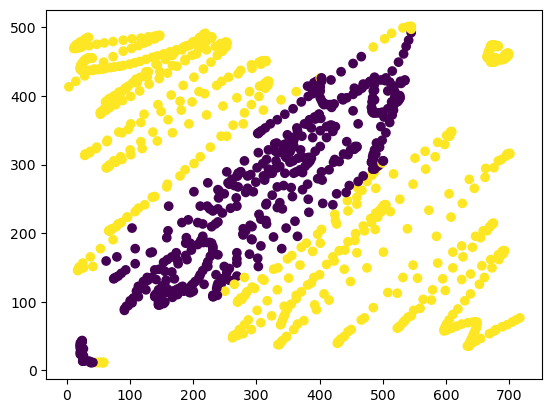

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ("scale", PolynomialFeatures()),
    ("model", LogisticRegression())
])

pred = pipe.fit(X, y).predict(X)
plt.scatter(X[:, 0], X[:, 1], c=pred)

In [ ]:
arr = np.array(["low", "medium", "high"]).reshape(-1, 1)
arr

array([['low'],
       ['medium'],
       ['high']], dtype='<U6')

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
enc = OneHotEncoder(handle_unknown='ignore', # Relevant for encoding, y can't have empty names so only X can allow this setting
                    sparse_output=False)
enc.fit_transform(arr)

array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [ ]:
enc.transform([["zero"]])

array([[0., 0., 0.]])

### Part 3 - Metrics

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

df  = pd.read_csv("data/creditcard.csv")[:80_000]
df.head(3)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [ ]:
X = df.drop(columns=['Time', 'Amount', 'Class']).values # remove the values because they are used to train the model
y = df['Class'].values
f"Shapes of X={X.shape} y={y.shape}, #Fraud Cases={y.sum()}"

'Shapes of X=(80000, 28) y=(80000,), #Fraud Cases=196'

In [ ]:
from sklearn.linear_model import LogisticRegression

mod = LogisticRegression(class_weight={0: 1, 1: 2}, max_iter=1000)
mod.fit(X, y).predict(X).sum()


172

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, make_scorer

grid = GridSearchCV(
    estimator=LogisticRegression(max_iter=1000),
    param_grid={'class_weight': [{0: 1, 1: v} for v in range(1, 4)]},
    cv=4,
    n_jobs=-1
)
grid.fit(X, y)


GridSearchCV(cv=4, estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid={'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 2},
                                          {0: 1, 1: 3}]})

![image.jpg](attachment:image.png)

In [ ]:
pd.DataFrame(grid.cv_results_)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_class_weight,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.331014,0.080911,0.002322,0.002728,"{0: 1, 1: 1}","{'class_weight': {0: 1, 1: 1}}",0.8431,0.99835,0.99950,0.99785,0.959700,0.067322,1
1,0.352375,0.043297,0.004422,0.001062,"{0: 1, 1: 2}","{'class_weight': {0: 1, 1: 2}}",0.8190,0.99840,0.99965,0.99805,0.953775,0.077815,2
2,0.321604,0.031019,0.003600,0.002716,"{0: 1, 1: 3}","{'class_weight': {0: 1, 1: 3}}",0.7089,0.99845,0.99960,0.99815,0.926275,0.125503,3


In [ ]:
# if want to apply weight to x
# X_weighted = X * [1.0, 0.5, 2.0, 0.1, ..., 1.0] Apply weight to each column


In [ ]:
from sklearn.metrics import make_scorer, precision_score, recall_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

grid = GridSearchCV(
    estimator=LogisticRegression(max_iter=1000),
    scoring={
        'precision': make_scorer(precision_score),
        'recall': make_scorer(recall_score)
    },
    refit='precision',
    param_grid={'class_weight': [{0: 1, 1: v} for v in range(1, 4)]},
    return_train_score=True,
    cv=10,
    n_jobs=-1
)

grid.fit(X, y)


GridSearchCV(cv=10, estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid={'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 2},
                                          {0: 1, 1: 3}]},
             refit='precision', return_train_score=True,
             scoring={'precision': make_scorer(precision_score, response_method='predict'),
                      'recall': make_scorer(recall_score, response_method='predict')})

In [ ]:
pd.DataFrame(grid.cv_results_)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_class_weight,params,split0_test_precision,split1_test_precision,split2_test_precision,split3_test_precision,...,split2_train_recall,split3_train_recall,split4_train_recall,split5_train_recall,split6_train_recall,split7_train_recall,split8_train_recall,split9_train_recall,mean_train_recall,std_train_recall
0,0.348427,0.081303,0.014484,0.010065,"{0: 1, 1: 1}","{'class_weight': {0: 1, 1: 1}}",1.0,0.463415,0.583333,1.0,...,0.632768,0.559322,0.573864,0.573864,0.562500,0.619318,0.625000,0.602273,0.611049,0.051750
1,0.531623,0.067148,0.014904,0.003209,"{0: 1, 1: 2}","{'class_weight': {0: 1, 1: 2}}",1.0,0.441860,0.583333,1.0,...,0.711864,0.649718,0.704545,0.693182,0.664773,0.704545,0.721591,0.698864,0.706321,0.046224
2,0.437376,0.052342,0.011475,0.002442,"{0: 1, 1: 3}","{'class_weight': {0: 1, 1: 3}}",1.0,0.431818,0.583333,1.0,...,0.785311,0.706215,0.744318,0.732955,0.721591,0.755682,0.772727,0.738636,0.750546,0.039134


In [ ]:
from sklearn.metrics import make_scorer, precision_score, recall_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

grid = GridSearchCV(
    estimator=LogisticRegression(max_iter=1000),
    scoring={
        'precision': make_scorer(precision_score),
        'recall': make_scorer(recall_score)
    },
    refit='precision',
    param_grid={'class_weight': [{0: 1, 1: v} for v in np.linspace(1, 20, 30)]},
    return_train_score=True,
    cv=10,
    n_jobs=-1
)

grid.fit(X, y)


GridSearchCV(cv=10, estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid={'class_weight': [{0: 1, 1: 1.0},
                                          {0: 1, 1: 1.6551724137931034},
                                          {0: 1, 1: 2.310344827586207},
                                          {0: 1, 1: 2.9655172413793105},
                                          {0: 1, 1: 3.6206896551724137},
                                          {0: 1, 1: 4.275862068965517},
                                          {0: 1, 1: 4.931034482758621},
                                          {0: 1, 1: 5.586206896551724},
                                          {0: 1, 1: 6.241379310344827},
                                          {0: 1, 1: 6.896551724137931},...
                                          {0: 1, 1: 16.06896551724138},
                                          {0: 1, 1: 16.724137931034484},
                                          {0: 1, 1: 17.379310344827587},
                                          {0: 1, 1: 18.03448275862069},
                                          {0: 1, 1: 18.689655172413794},
                                          {0: 1, 1: 19.344827586206897},
                                          {0: 1, 1: 20.0}]},
             refit='precision', return_train_score=True,
             scoring={'precision': make_scorer(precision_score, response_method='predict'),
                      'recall': make_scorer(recall_score, response_method='predict')})

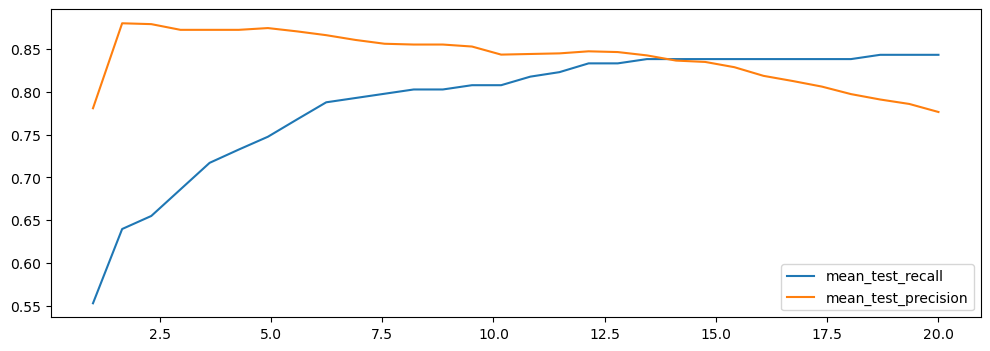

In [ ]:
plt.figure(figsize=(12, 4))
df_results = pd.DataFrame(grid.cv_results_)
for score in ['mean_test_recall', 'mean_test_precision']:
    plt.plot([_[1] for _ in df_results['param_class_weight']],
            df_results[score],
            label=score)
plt.legend()

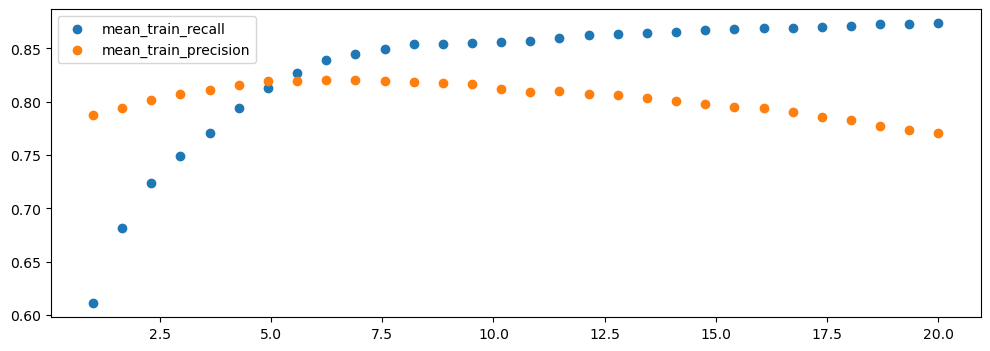

In [ ]:
plt.figure(figsize=(12, 4))
df_results = pd.DataFrame(grid.cv_results_)
for score in ['mean_train_recall', 'mean_train_precision']:
    plt.scatter(x=[_[1] for _ in df_results['param_class_weight']],
                y=df_results[score.replace('test', 'train')],
                label=score)
plt.legend()


In [ ]:
from sklearn.metrics import make_scorer, precision_score, recall_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

def min_recall_precision(y_true, y_pred):
    recall = recall_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    return min(recall, precision)


grid = GridSearchCV(
    estimator=LogisticRegression(max_iter=1000),
    scoring={
        'precision': make_scorer(precision_score),
        'recall': make_scorer(recall_score),
        'min_both': make_scorer(min_recall_precision)},
    refit='precision',
    param_grid={'class_weight': [{0: 1, 1: v} for v in np.linspace(1, 20, 30)]},
    return_train_score=True,
    cv=10,
    n_jobs=-1
)

grid.fit(X, y)

GridSearchCV(cv=10, estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid={'class_weight': [{0: 1, 1: 1.0},
                                          {0: 1, 1: 1.6551724137931034},
                                          {0: 1, 1: 2.310344827586207},
                                          {0: 1, 1: 2.9655172413793105},
                                          {0: 1, 1: 3.6206896551724137},
                                          {0: 1, 1: 4.275862068965517},
                                          {0: 1, 1: 4.931034482758621},
                                          {0: 1, 1: 5.586206896551724},
                                          {0: 1, 1: 6.241379310344827},
                                          {0: 1, 1: 6.896551724137931},...
                                          {0: 1, 1: 17.379310344827587},
                                          {0: 1, 1: 18.03448275862069},
                                          {0: 1, 1: 18.689655172413794},
                                          {0: 1, 1: 19.344827586206897},
                                          {0: 1, 1: 20.0}]},
             refit='precision', return_train_score=True,
             scoring={'min_both': make_scorer(min_recall_precision, response_method='predict'),
                      'precision': make_scorer(precision_score, response_method='predict'),
                      'recall': make_scorer(recall_score, response_method='predict')})

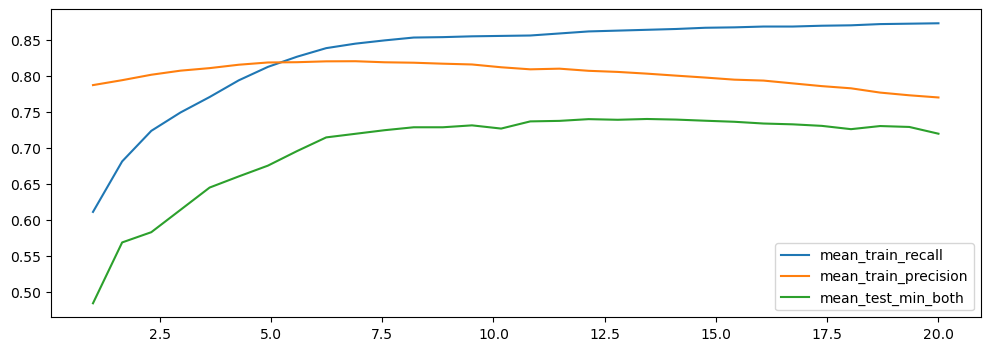

In [ ]:
plt.figure(figsize=(12, 4))
df_results = pd.DataFrame(grid.cv_results_)
for score in ['mean_train_recall', 'mean_train_precision', 'mean_test_min_both']:
    plt.plot([_[1] for _ in df_results['param_class_weight']],
            df_results[score],
            label=score)
plt.legend()

In [ ]:
from collections import Counter
from sklearn.ensemble import IsolationForest
mod = IsolationForest().fit(X)
np.where(mod.predict(X) == -1, 1, 0)

array([0, 0, 0, ..., 0, 0, 0])

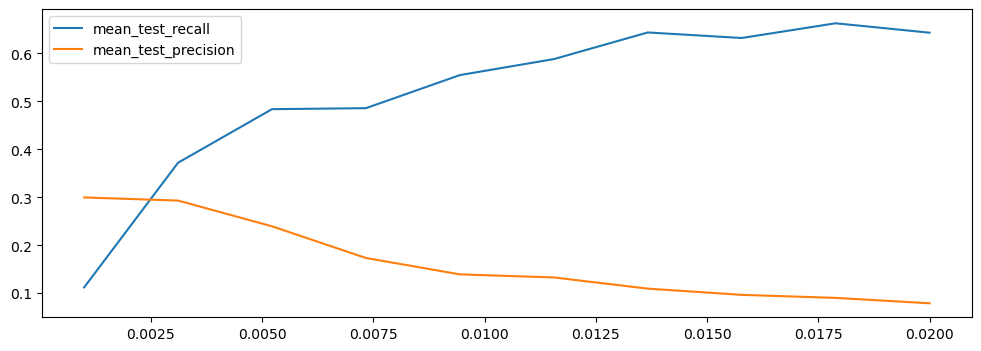

In [ ]:
def outlier_precision(mod, X, y):
    preds = mod.predict(X)
    return precision_score(y, np.where(preds == -1, 1, 0)) # outlier prediction to fraud label prediction
def outlier_recall(mod, X, y):
    preds = mod.predict(X)
    return recall_score(y, np.where(preds == -1, 1, 0))

grid = GridSearchCV(
    estimator=IsolationForest(),
    param_grid={'contamination': np.linspace(0.001, 0.02, 10)},
    scoring={'precision': outlier_precision,
            'recall': outlier_recall},
    refit='precision',
    cv=5,
    n_jobs=-1
)
grid.fit(X, y)

plt.figure(figsize=(12, 4))
df_results = pd.DataFrame(grid.cv_results_)
for score in ['mean_test_recall', 'mean_test_precision']:
    plt.plot(df_results['param_contamination'],
            df_results[score],
            label=score)
plt.legend()


### Part 4 - Meta-Estimators

In [ ]:
import numpy as np
import matplotlib.pylab as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.datasets import make_classification

Voting Classifier

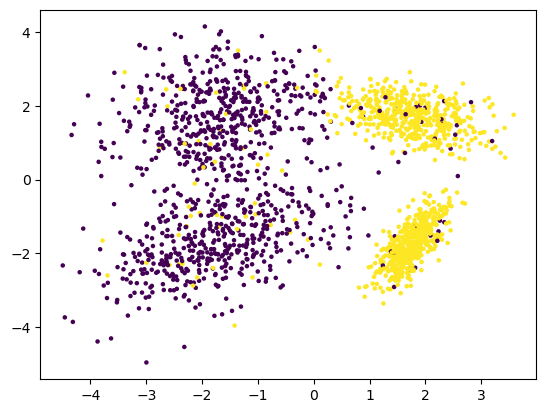

In [ ]:
X, y = make_classification(n_samples=2000, n_features=2,
                           n_redundant=0, random_state=21,
                           class_sep=1.75, flip_y=0.1)
plt.scatter(X[:, 0], X[:, 1], c=y, s=5)

In [ ]:
def make_plots():
    X_new = np.concatenate([
        np.random.uniform(np.min(X[:, 0]), np.max(X[:, 0]), (20000, 1)),
        np.random.uniform(np.min(X[:, 1]), np.max(X[:, 1]), (20000, 1))
    ], axis=1)
    plt.figure(figsize=(16, 4))
    plt.subplot(141)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=5)
    plt.title("original data")
    plt.subplot(142)
    plt.scatter(X_new[:, 0], X_new[:, 1], c=clf1.predict_proba(X_new)[:, 1], s=5)
    plt.title("ens1")
    plt.subplot(143)
    plt.scatter(X_new[:, 0], X_new[:, 1], c=clf2.predict_proba(X_new)[:, 1], s=5)
    plt.title("ens2")
    plt.subplot(144)
    plt.scatter(X_new[:, 0], X_new[:, 1], c=clf3.predict_proba(X_new)[:, 1], s=5)
    plt.title("ens3")

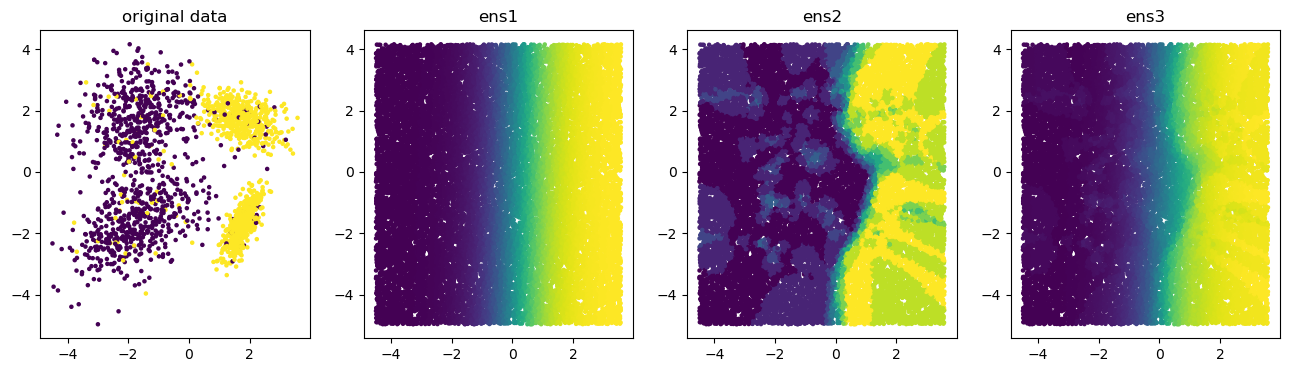

In [ ]:
clf1 = LogisticRegression().fit(X, y)
clf2 = KNeighborsClassifier(n_neighbors=10).fit(X, y)
clf3 = VotingClassifier(estimators=[('clf1', clf1), ('clf2', clf2)],
                        voting='soft',
                        weights=[10.5, 2.5])
clf3.fit(X, y)

make_plots()